In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import mpl_toolkits.mplot3d.axes3d as p3
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import metrics, mixture, cluster, datasets
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice
import time
from math import ceil

In [36]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', palette='viridis')

In [37]:
df = pd.read_csv('6M-0K-99K.users.dataset.public.csv')
display(df.head(), df.describe(), df.info(), df.isnull().sum(), df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,9.891300e+04,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,-6.692039e+15,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,1.773993,581.291236,3063.771870,102.125583,8.510424
std,5.330807e+18,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,0.428679,208.855888,168.298621,5.609735,0.467863
min,-9.223101e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.622895e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,572.000000,2857.000000,95.230000,7.940000
50%,-1.337989e+15,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,694.000000,3196.000000,106.530000,8.880000
75%,4.616388e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,702.000000,3201.000000,106.700000,8.890000
max,9.223331e+18,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,709.000000,3205.000000,106.830000,8.900000


None

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

identifierHash         98913
type                       1
country                  200
language                   5
socialNbFollowers         90
socialNbFollows           85
socialProductsLiked      420
productsListed            65
productsSold              75
productsPassRate          72
productsWished           279
productsBought            70
gender                     2
civilityGenderId           3
civilityTitle              3
hasAnyApp                  2
hasAndroidApp              2
hasIosApp                  2
hasProfilePicture          2
daysSinceLastLogin       699
seniority                 19
seniorityAsMonths         19
seniorityAsYears           6
countryCode              199
dtype: int64

In [38]:
df.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

In [39]:
df.drop(['identifierHash'], axis=1, inplace=True)

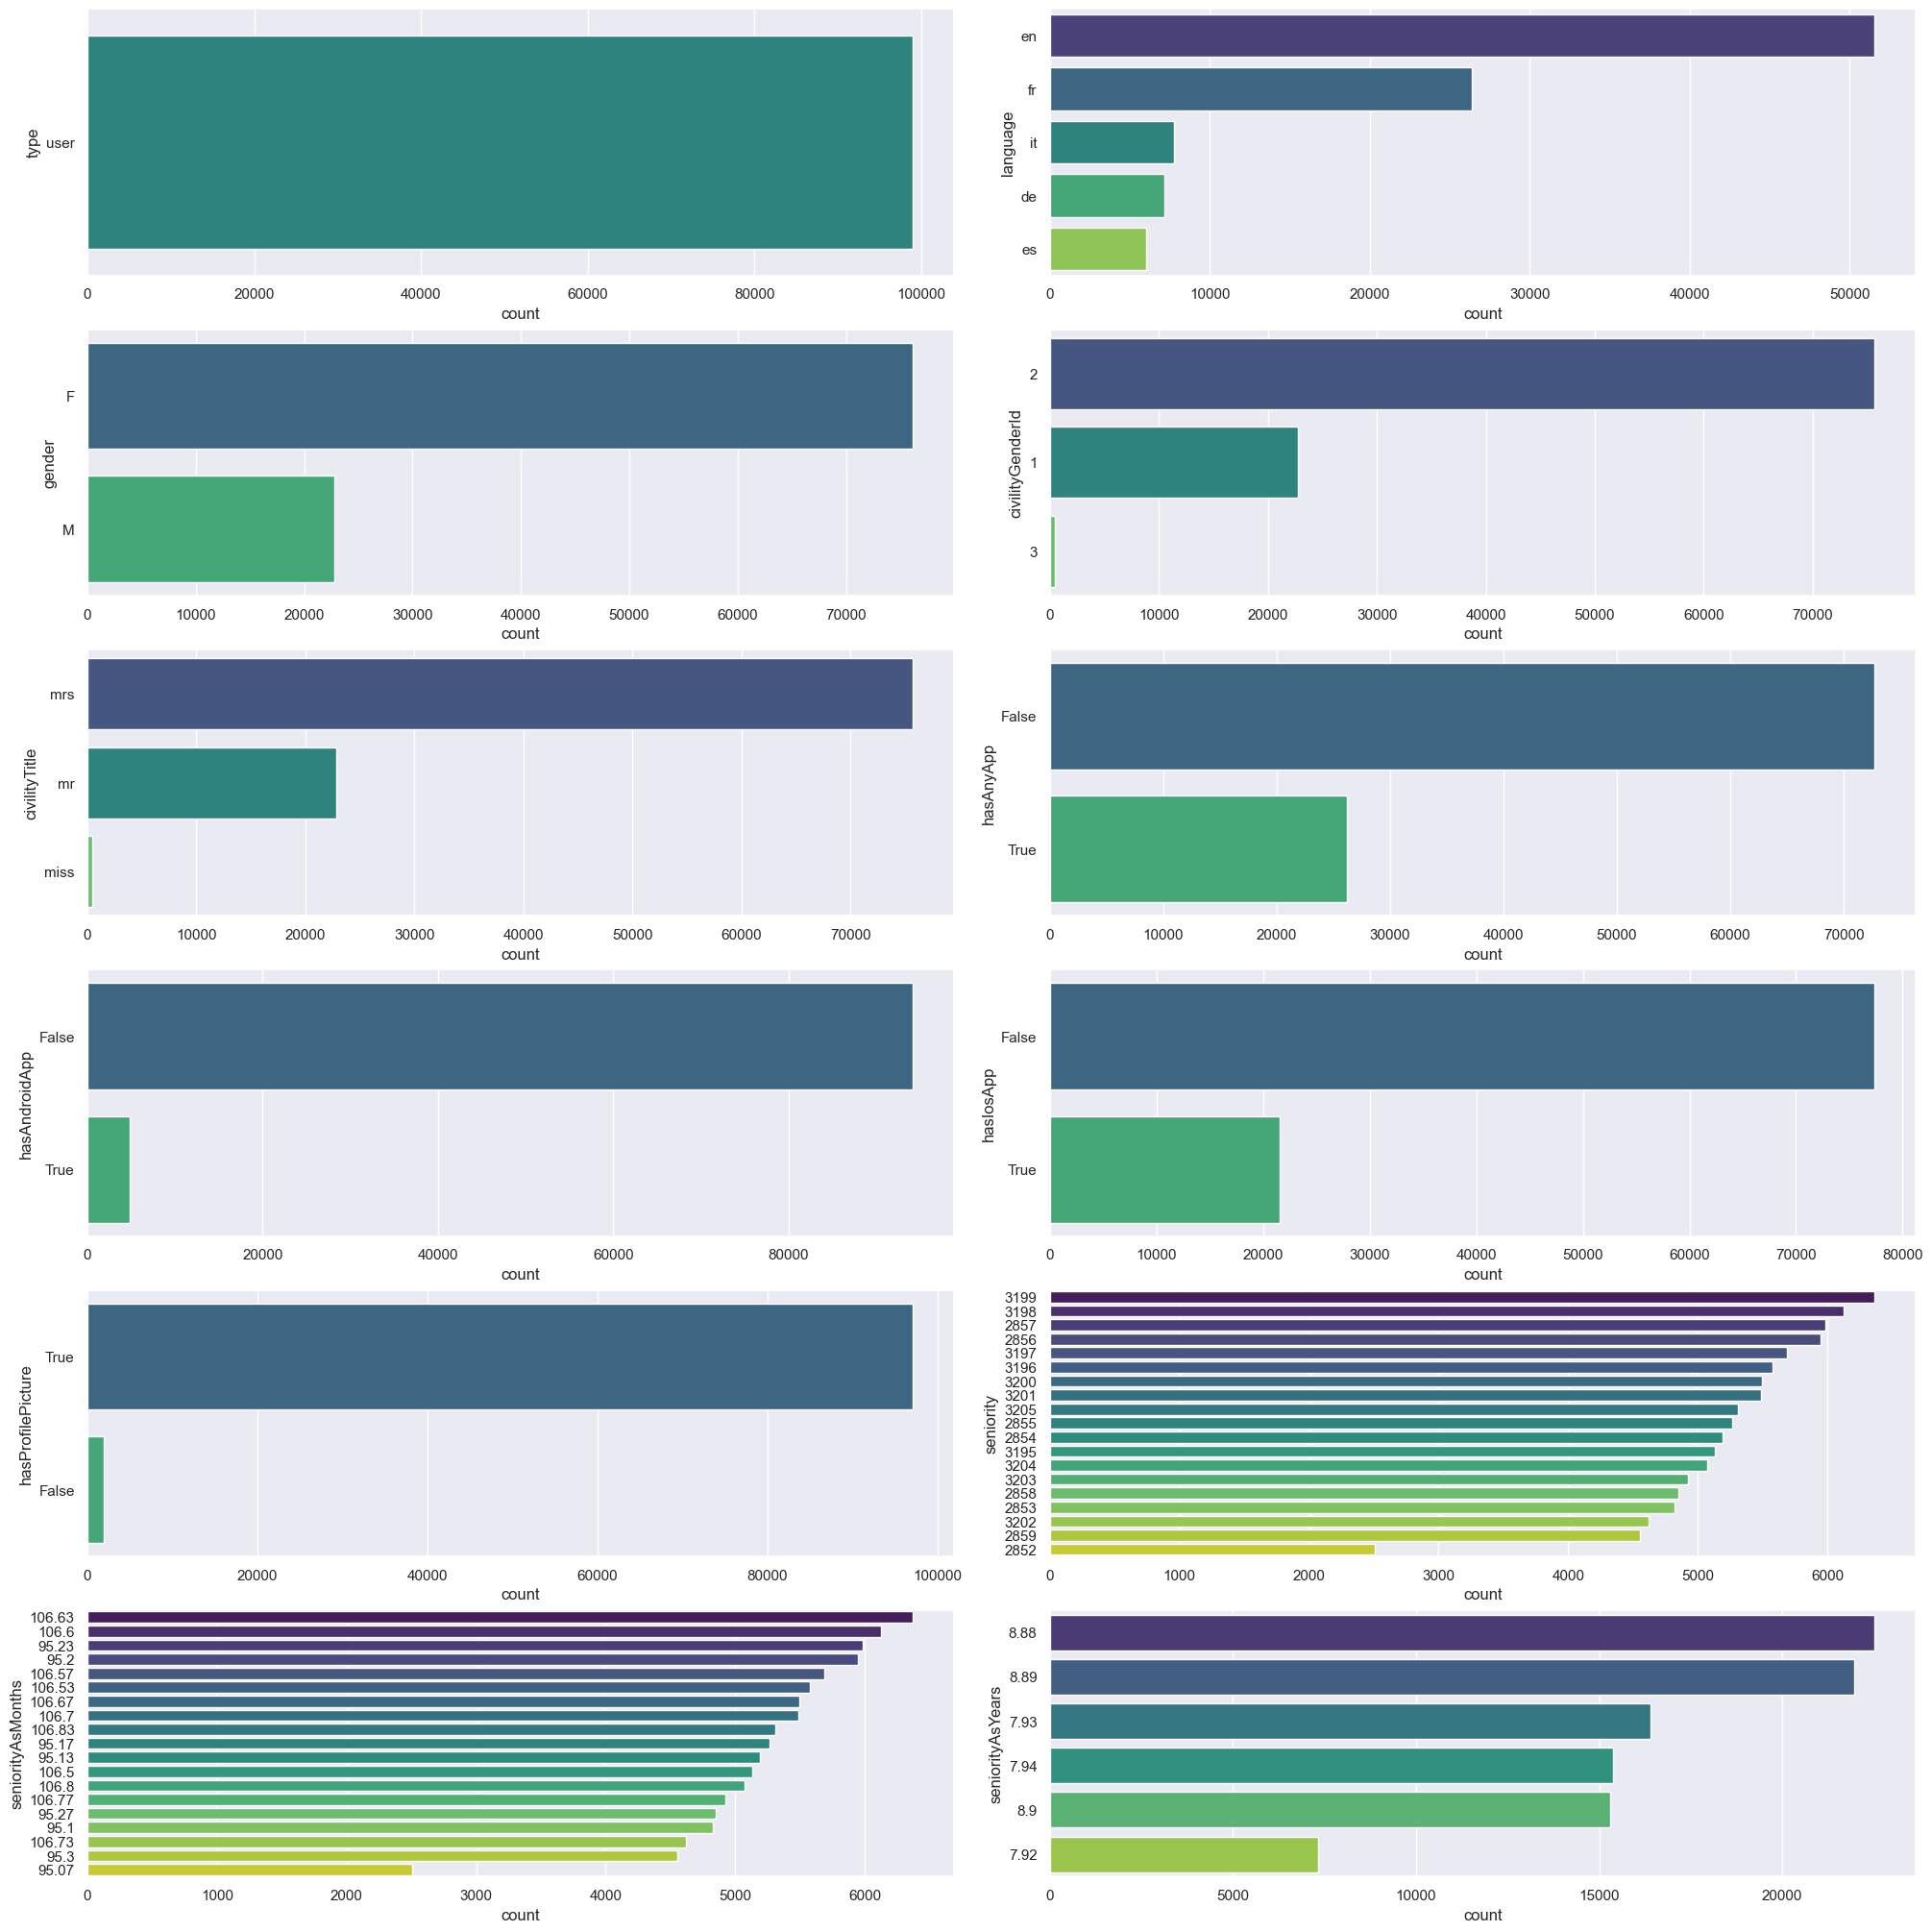

In [40]:
fig, axs = plt.subplots(6, 2, figsize=(20, 20), constrained_layout=True)
categorical = ['type', 'language', 'gender',
               'civilityGenderId', 'civilityTitle', 'hasAnyApp', 'hasAndroidApp',
               'hasIosApp', 'hasProfilePicture', 'seniority',
               'seniorityAsMonths', 'seniorityAsYears', ]
for i, f in enumerate(categorical):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='viridis')

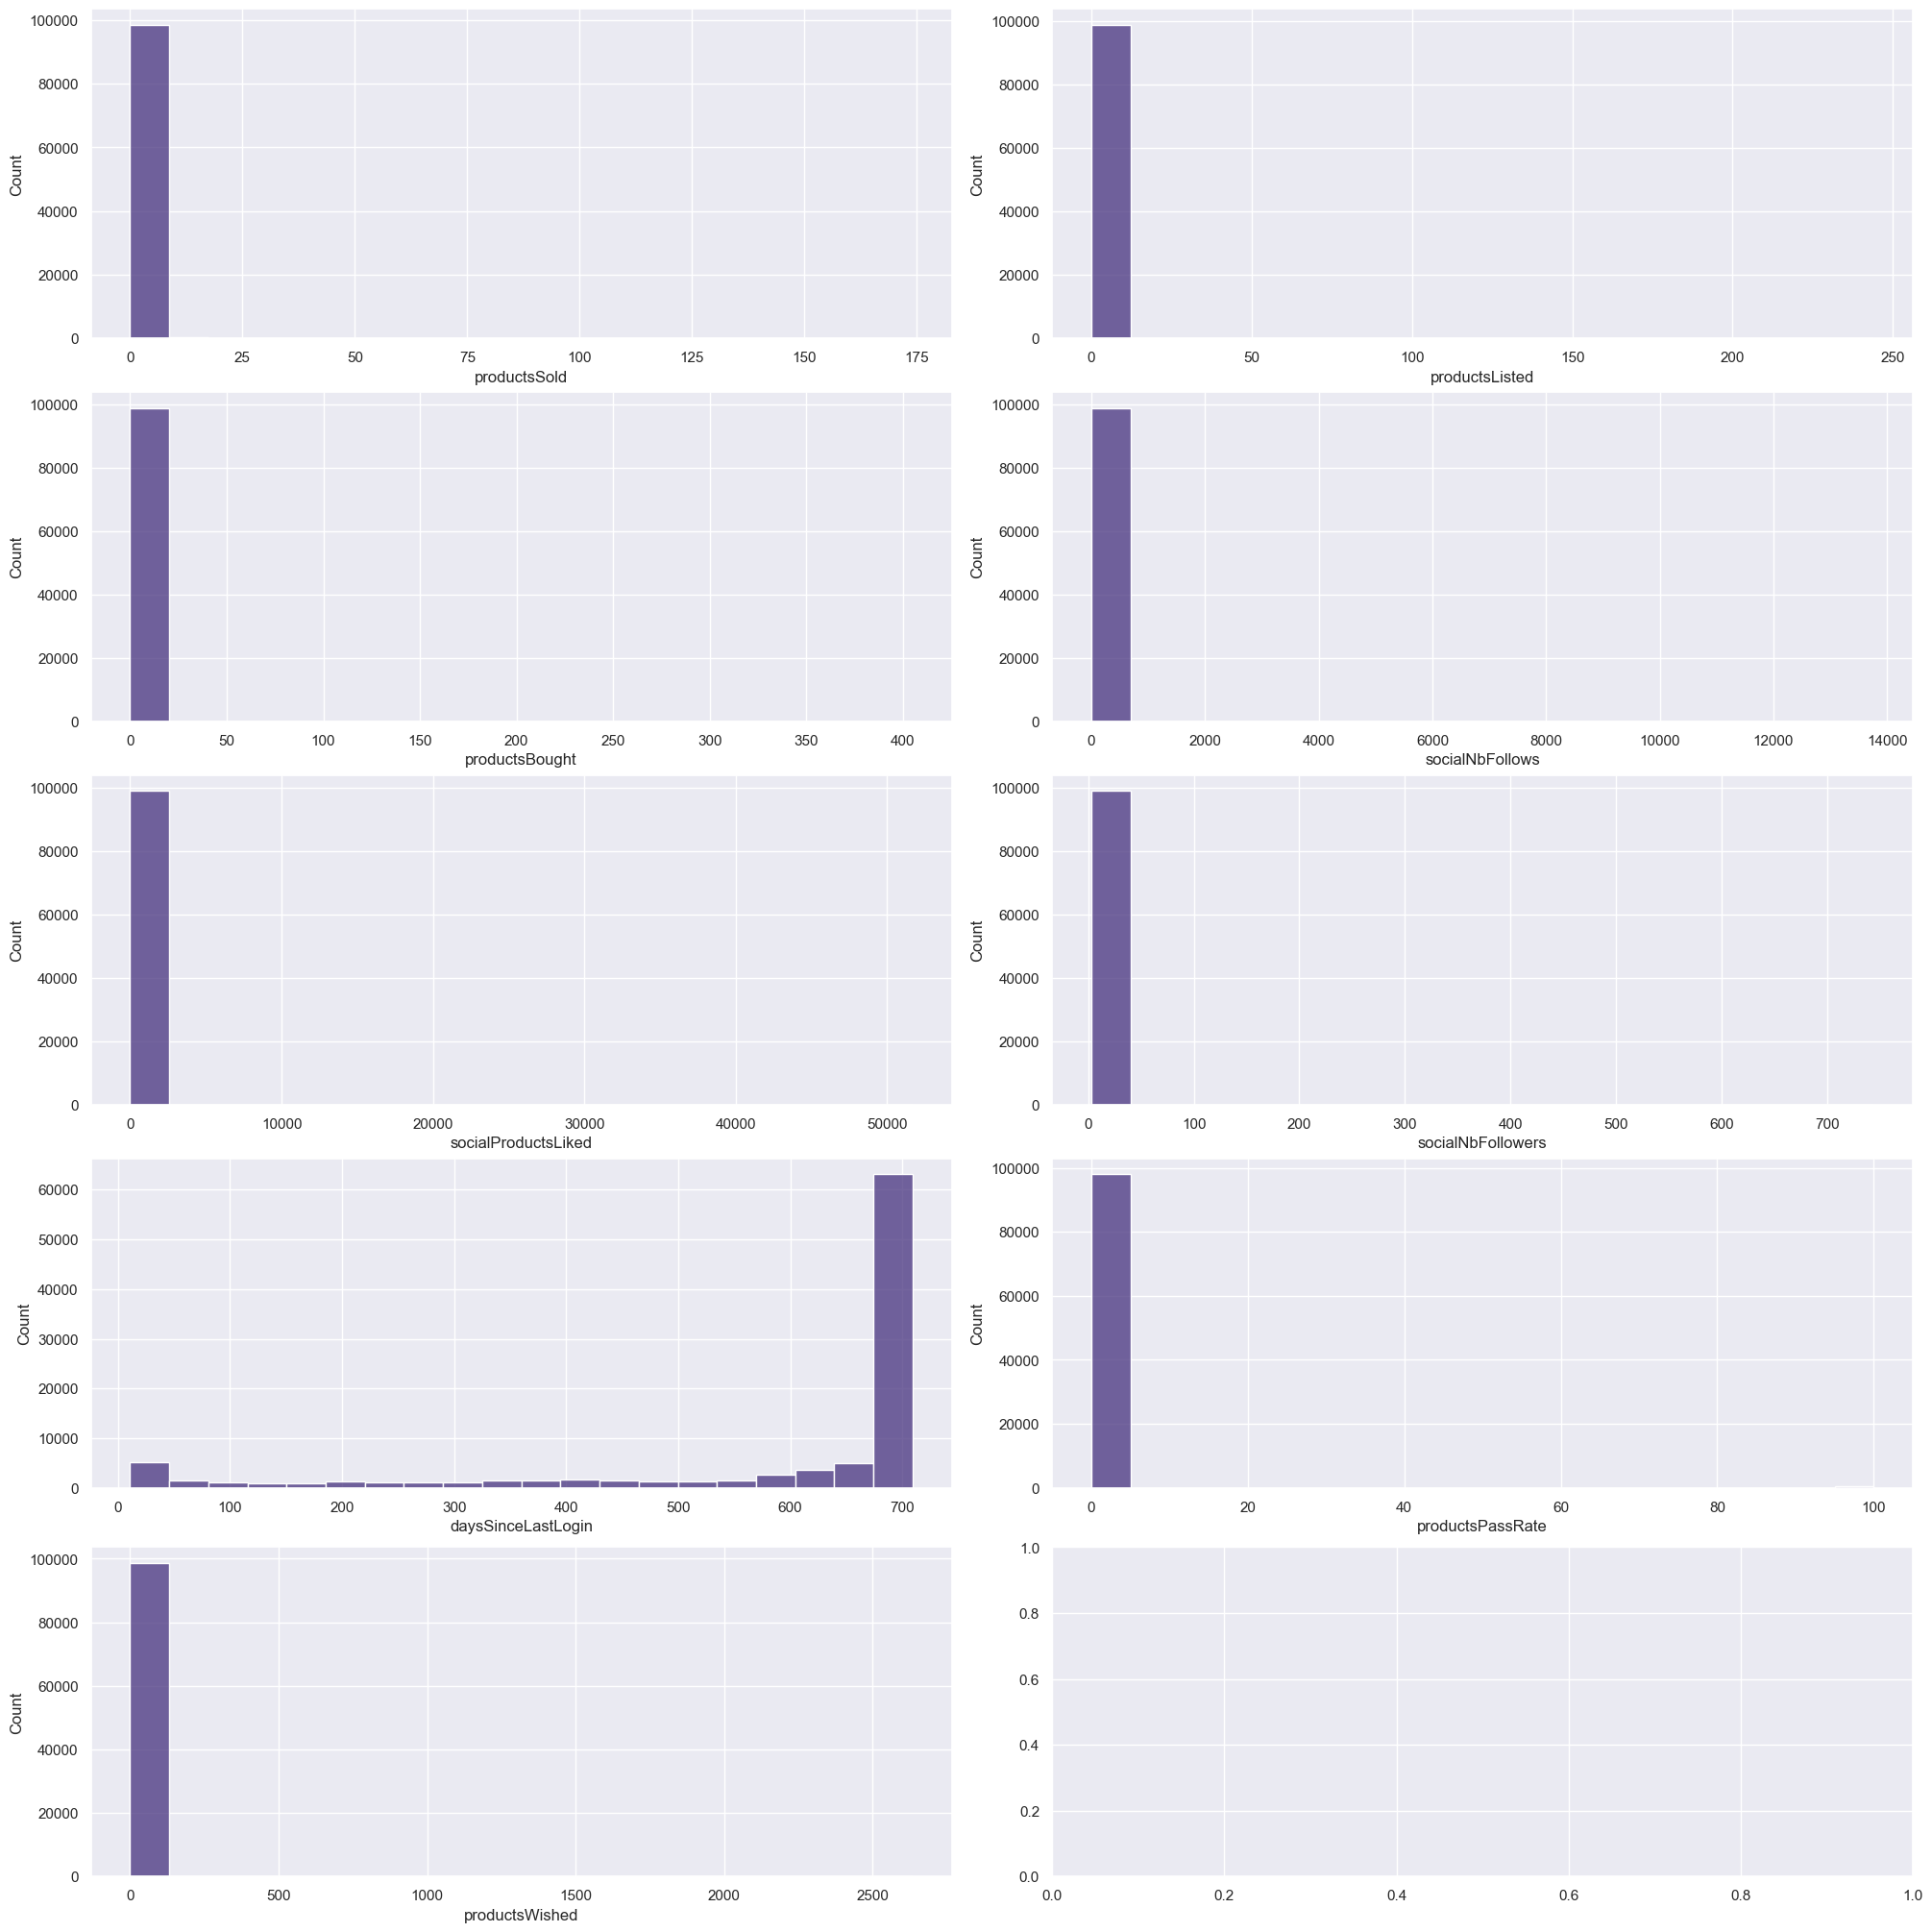

In [41]:
numerical = set(df.columns)-set(categorical)-{'countryCode', 'country'}
fig, axs = plt.subplots(len(numerical)//2+1, 2,
                        figsize=(20, 20), constrained_layout=True)

for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df,
                 ax=axs[i//2][i % 2], bins=20,
                 palette=sns.color_palette("viridis", 2))

plt.show()

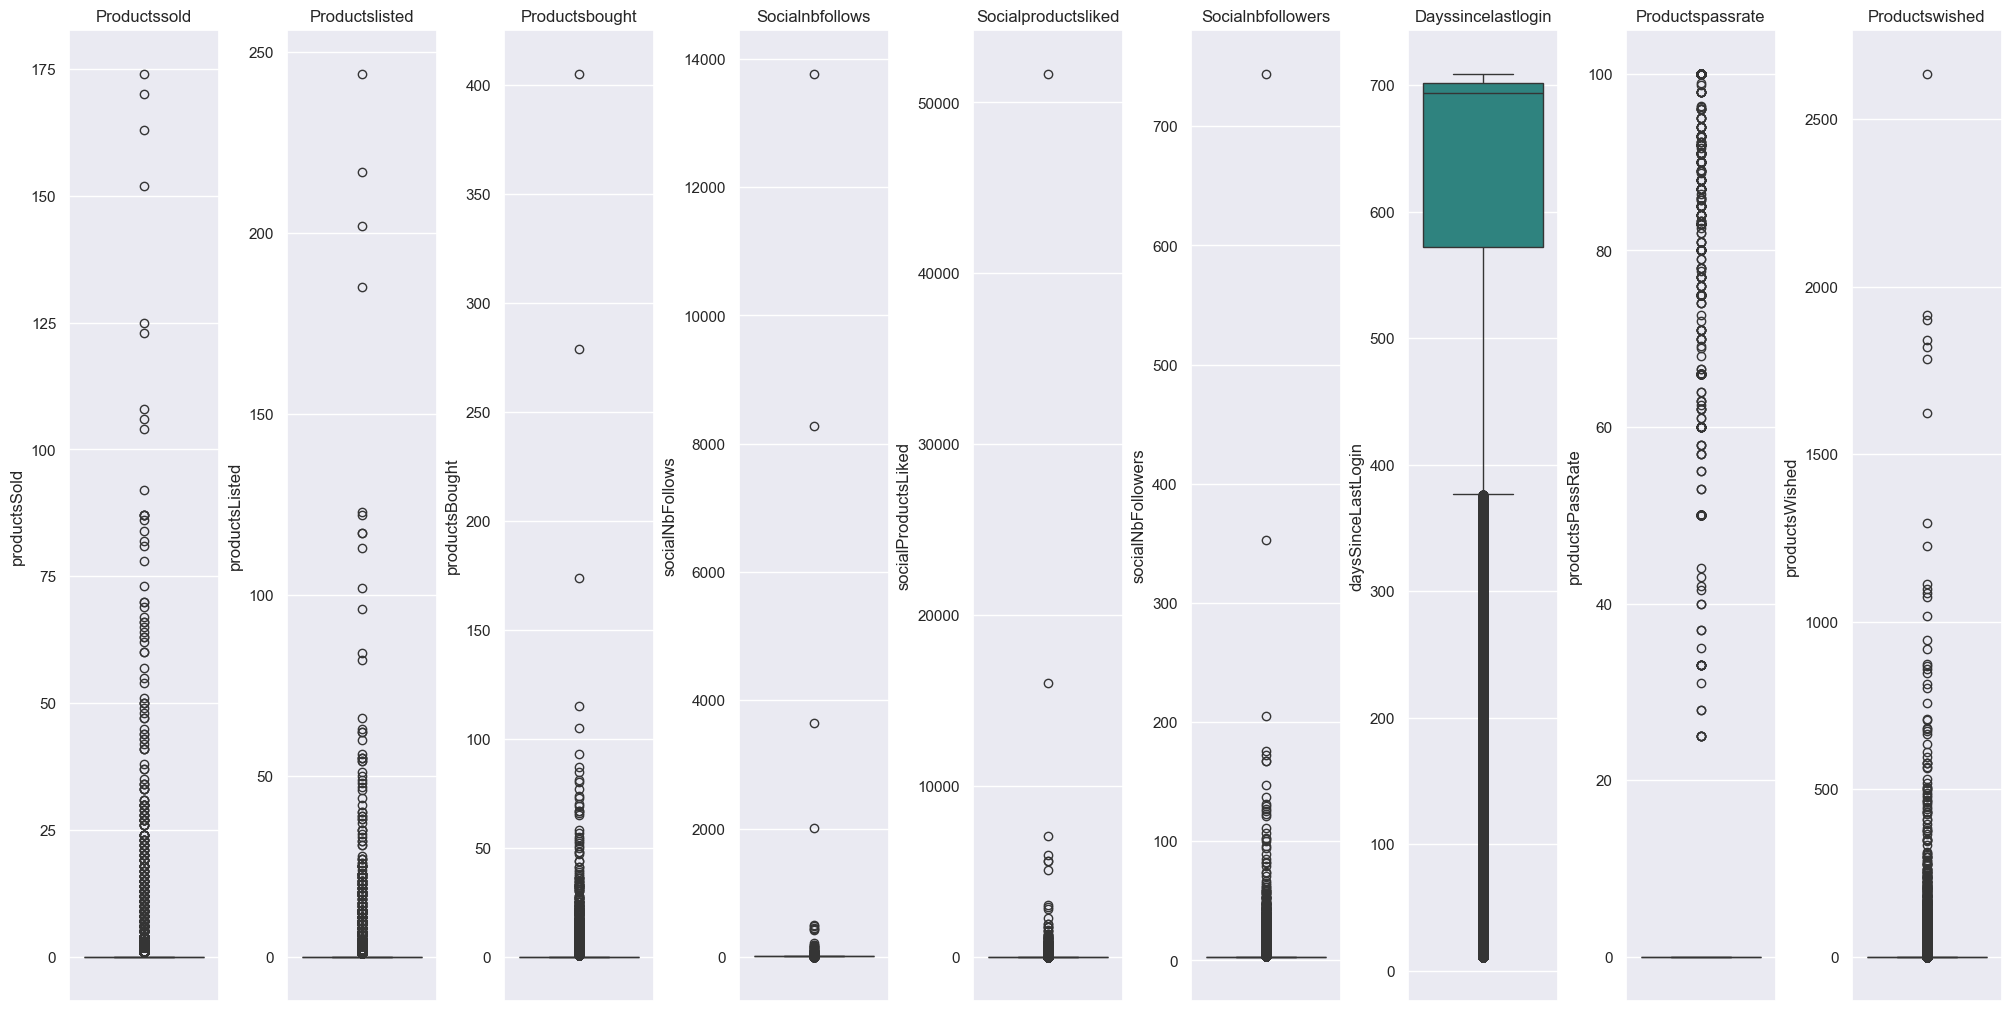

In [42]:
fig, axs = plt.subplots(1, 9,
                        figsize=(20, 10), constrained_layout=True)
for i, f in enumerate(numerical):
    sns.boxplot(y=f,  data=df,  ax=axs[i],
                palette="viridis")
    axs[i].set_title(f.capitalize())


plt.show()

In [43]:
# drop columns
df.drop(numerical, axis=1, inplace=True)

In [44]:
df.head()

,type,country,language,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,user,Royaume-Uni,en,M,1,mr,True,False,True,True,3196,106.53,8.88,gb
1,user,Monaco,en,F,2,mrs,True,False,True,True,3204,106.80,8.90,mc
2,user,France,fr,F,2,mrs,True,False,True,False,3203,106.77,8.90,fr
3,user,Etats-Unis,en,F,2,mrs,True,False,True,False,3198,106.60,8.88,us
4,user,Etats-Unis,en,F,2,mrs,False,False,False,True,2854,95.13,7.93,us


In [45]:
df.drop(['country', 'language'], axis=1, inplace=True)
df.head()

,type,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,user,M,1,mr,True,False,True,True,3196,106.53,8.88,gb
1,user,F,2,mrs,True,False,True,True,3204,106.80,8.90,mc
2,user,F,2,mrs,True,False,True,False,3203,106.77,8.90,fr
3,user,F,2,mrs,True,False,True,False,3198,106.60,8.88,us
4,user,F,2,mrs,False,False,False,True,2854,95.13,7.93,us


In [46]:
df.drop(['type'], axis=1, inplace=True)

In [47]:
df.drop(['civilityGenderId', 'civilityTitle'], axis=1, inplace=True)

In [48]:
df.head()

,gender,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,M,True,False,True,True,3196,106.53,8.88,gb
1,F,True,False,True,True,3204,106.80,8.90,mc
2,F,True,False,True,False,3203,106.77,8.90,fr
3,F,True,False,True,False,3198,106.60,8.88,us
4,F,False,False,False,True,2854,95.13,7.93,us


In [49]:
country_count = dict(df['countryCode'].value_counts())

In [50]:
# encode categorical
df["gender"] = df["gender"].map({'M': 0, 'F': 1})

In [51]:

# count encoder
df['countryCode'] = df['countryCode'].map(country_count)

In [52]:
df.head()

,gender,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,0,True,False,True,True,3196,106.53,8.88,11310
1,1,True,False,True,True,3204,106.80,8.90,36
2,1,True,False,True,False,3203,106.77,8.90,25135
3,1,True,False,True,False,3198,106.60,8.88,20602
4,1,False,False,False,True,2854,95.13,7.93,20602


In [53]:
# convert bool to int
df['hasAnyApp'] = df['hasAnyApp'].astype(int)
df['hasAndroidApp'] = df['hasAndroidApp'].astype(int)
df['hasIosApp'] = df['hasIosApp'].astype(int)
df['hasProfilePicture'] = df['hasProfilePicture'].astype(int)

In [54]:
# standartize
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.describe()

,gender,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,seniority,seniorityAsMonths,seniorityAsYears,countryCode
count,9.891300e+04,9.891300e+04,9.891300e+04,9.891300e+04,9.891300e+04,9.891300e+04,9.891300e+04,9.891300e+04,9.891300e+04
mean,1.194259e-17,-8.045534e-18,1.375643e-17,3.189479e-17,-1.827485e-16,-1.111433e-15,-2.013682e-15,1.960811e-15,8.138919e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.827515e+00,-5.998620e-01,-2.263067e-01,-5.274248e-01,-7.155196e+00,-1.258317e+00,-1.257745e+00,-1.261967e+00,-1.455866e+00
25%,5.471910e-01,-5.998620e-01,-2.263067e-01,-5.274248e-01,1.397586e-01,-1.228607e+00,-1.229224e+00,-1.219219e+00,-8.470994e-01
50%,5.471910e-01,-5.998620e-01,-2.263067e-01,-5.274248e-01,1.397586e-01,7.856796e-01,7.851421e-01,7.899267e-01,-2.491100e-01
75%,5.471910e-01,1.667050e+00,-2.263067e-01,-5.274248e-01,1.397586e-01,8.153889e-01,8.154467e-01,8.113006e-01,1.226123e+00
max,5.471910e-01,1.667050e+00,4.418781e+00,1.896005e+00,1.397586e-01,8.391563e-01,8.386208e-01,8.326745e-01,1.226123e+00


In [55]:
df.head()

,gender,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1.827515,1.667050,-0.226307,1.896005,0.139759,0.785680,0.785142,0.789927,-0.249110
1,0.547191,1.667050,-0.226307,1.896005,0.139759,0.833214,0.833273,0.832675,-1.452132
2,0.547191,1.667050,-0.226307,1.896005,-7.155196,0.827273,0.827925,0.832675,1.226123
3,0.547191,1.667050,-0.226307,1.896005,-7.155196,0.797563,0.797620,0.789927,0.742417
4,0.547191,-0.599862,-0.226307,-0.527425,0.139759,-1.246433,-1.247050,-1.240593,0.742417


In [56]:
df.columns
df.describe()

,gender,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,seniority,seniorityAsMonths,seniorityAsYears,countryCode
count,9.891300e+04,9.891300e+04,9.891300e+04,9.891300e+04,9.891300e+04,9.891300e+04,9.891300e+04,9.891300e+04,9.891300e+04
mean,1.194259e-17,-8.045534e-18,1.375643e-17,3.189479e-17,-1.827485e-16,-1.111433e-15,-2.013682e-15,1.960811e-15,8.138919e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.827515e+00,-5.998620e-01,-2.263067e-01,-5.274248e-01,-7.155196e+00,-1.258317e+00,-1.257745e+00,-1.261967e+00,-1.455866e+00
25%,5.471910e-01,-5.998620e-01,-2.263067e-01,-5.274248e-01,1.397586e-01,-1.228607e+00,-1.229224e+00,-1.219219e+00,-8.470994e-01
50%,5.471910e-01,-5.998620e-01,-2.263067e-01,-5.274248e-01,1.397586e-01,7.856796e-01,7.851421e-01,7.899267e-01,-2.491100e-01
75%,5.471910e-01,1.667050e+00,-2.263067e-01,-5.274248e-01,1.397586e-01,8.153889e-01,8.154467e-01,8.113006e-01,1.226123e+00
max,5.471910e-01,1.667050e+00,4.418781e+00,1.896005e+00,1.397586e-01,8.391563e-01,8.386208e-01,8.326745e-01,1.226123e+00


<Axes: >

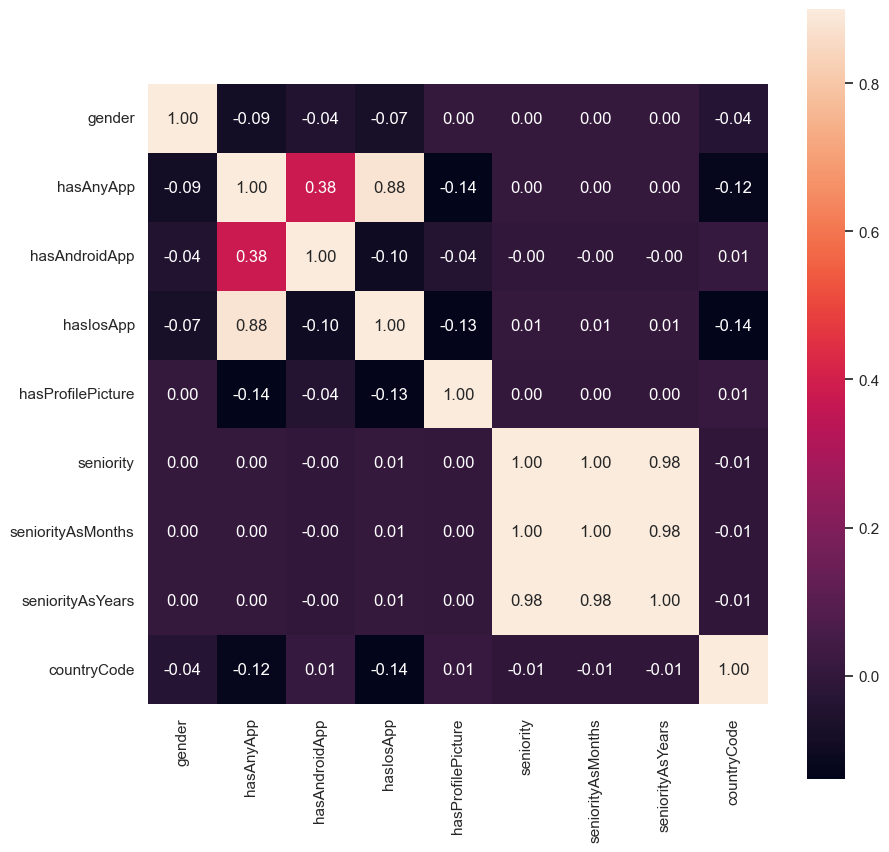

In [57]:
corr_matrix = df.corr(method="spearman")
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix,  vmax=.9, square=True,
            annot=True, fmt='.2f')

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

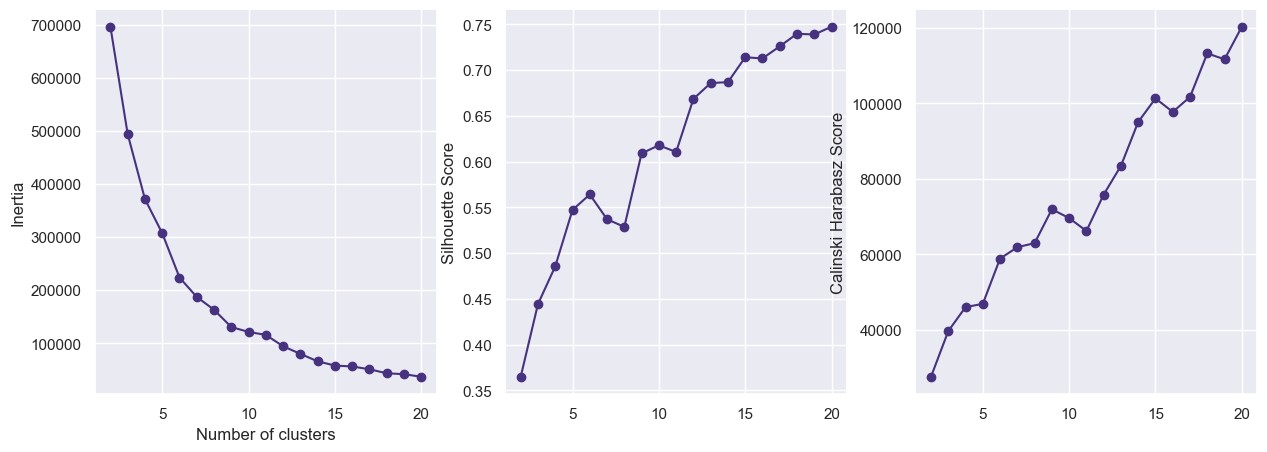

In [58]:
k_range = range(2, 21)
inertia = []
silhouette = []
calinski = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette.append(metrics.silhouette_score(
        df, kmeans.labels_, sample_size=10000))
    calinski.append(metrics.calinski_harabasz_score(df, kmeans.labels_))
    print(k, end=' ')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette, marker='o')
plt.ylabel('Silhouette Score')
plt.subplot(1, 3, 3)
plt.plot(k_range, calinski, marker='o')
plt.ylabel('Calinski Harabasz Score')
plt.show()

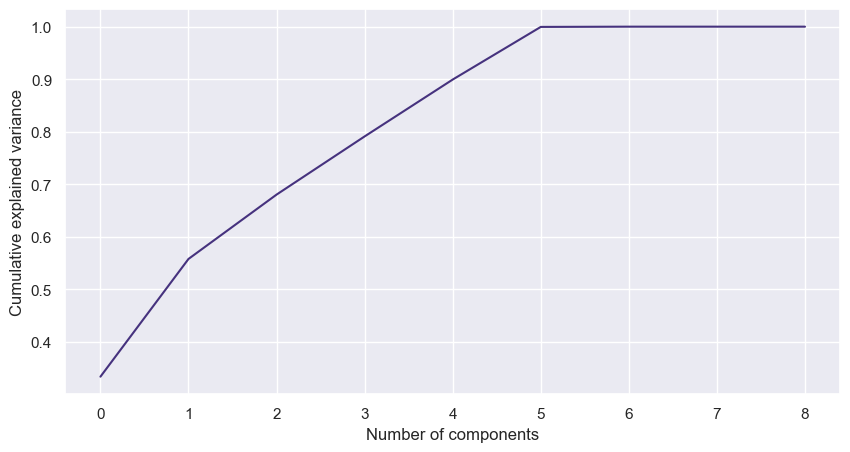

In [60]:
# apply pca
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
data_pca = pca.transform(df)

# plot pca
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

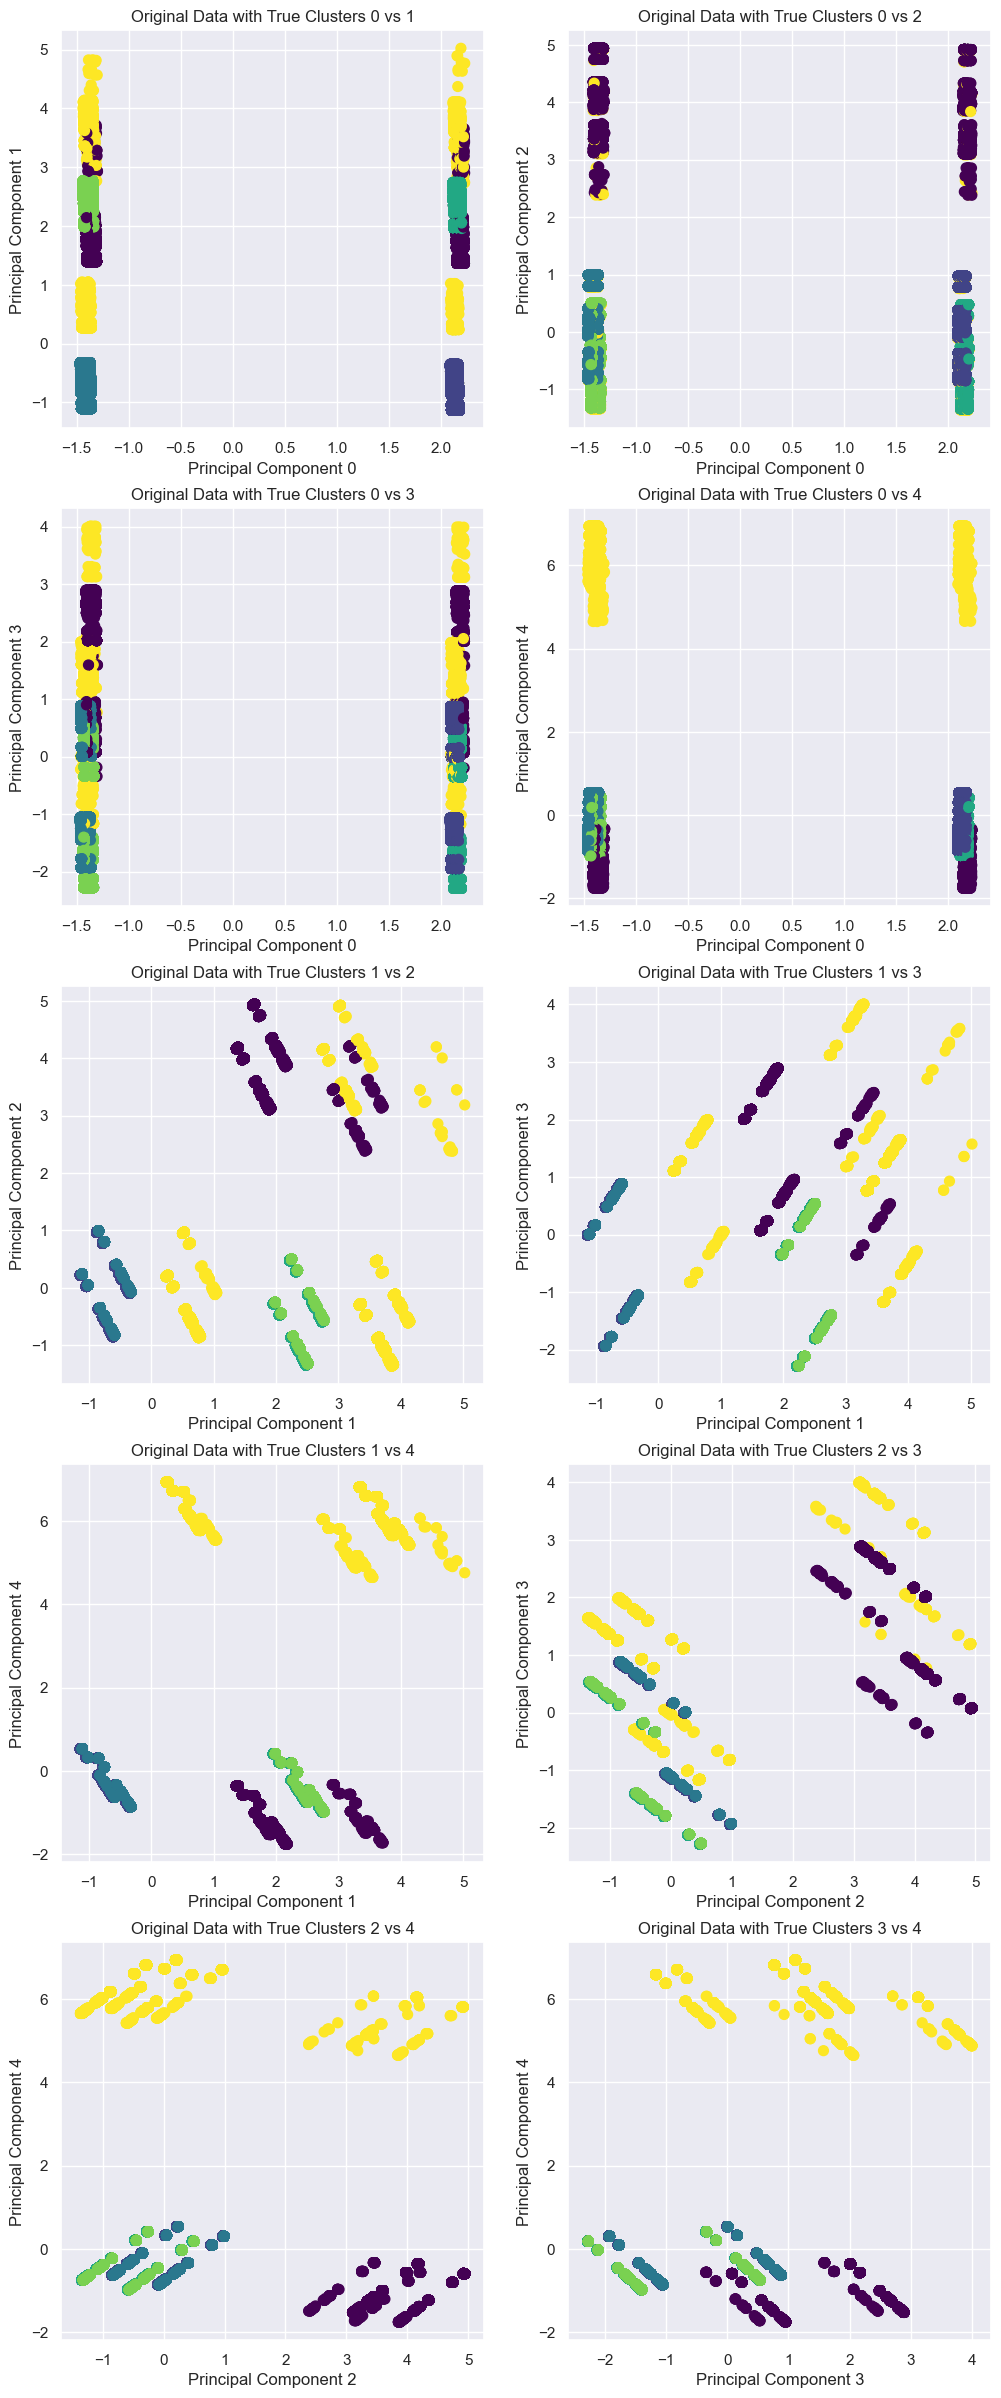

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(df)

# Plot the original data with cluster assignments
plt.figure(figsize=(12, 30))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2),
                    (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(5, 2, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

In [62]:
df2 = df.copy()

In [63]:
df2.drop(['seniorityAsYears', 'seniorityAsMonths'], axis=1, inplace=True)

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

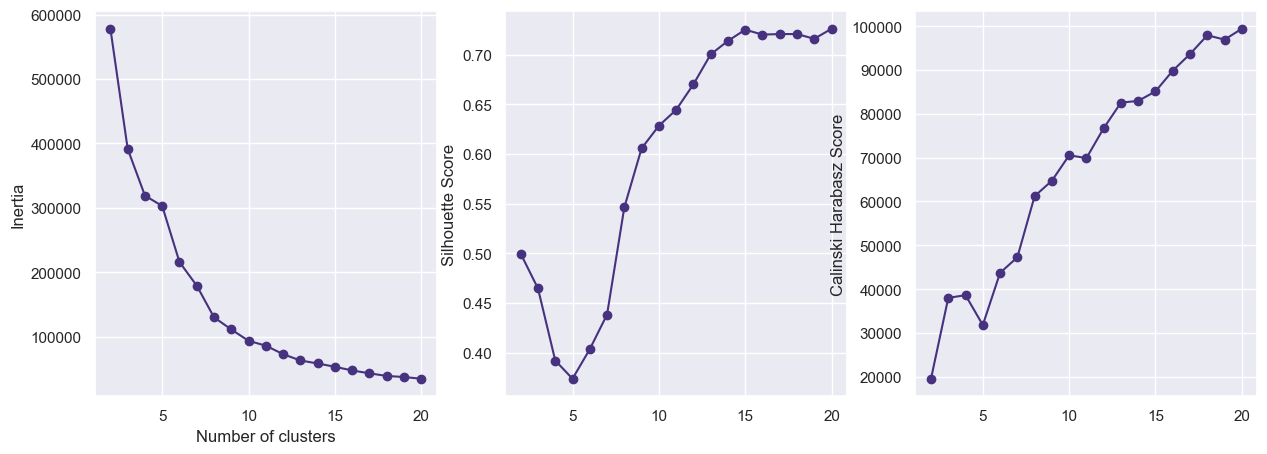

In [65]:
k_range = range(2, 21)
inertia = []
silhouette = []
calinski = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)
    silhouette.append(metrics.silhouette_score(
        df2, kmeans.labels_, sample_size=10000))
    calinski.append(metrics.calinski_harabasz_score(df2, kmeans.labels_))
    print(k, end=' ')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette, marker='o')
plt.ylabel('Silhouette Score')
plt.subplot(1, 3, 3)
plt.plot(k_range, calinski, marker='o')
plt.ylabel('Calinski Harabasz Score')
plt.show()

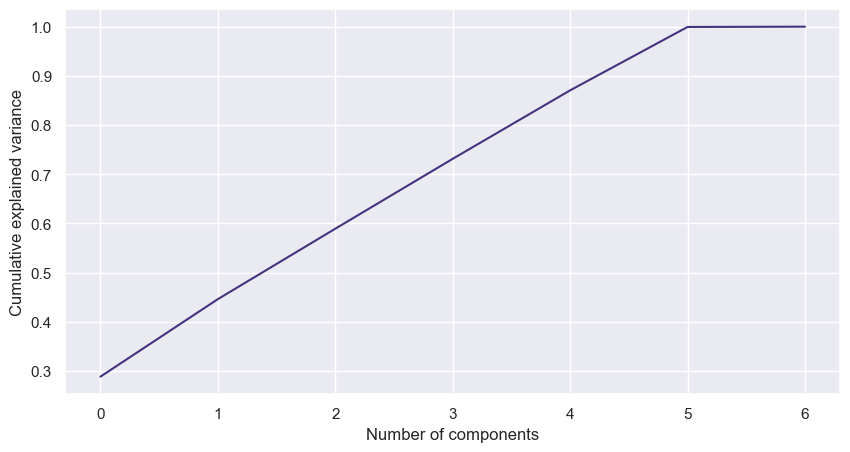

In [66]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df2)
data_pca = pca.transform(df2)

# plot pca
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

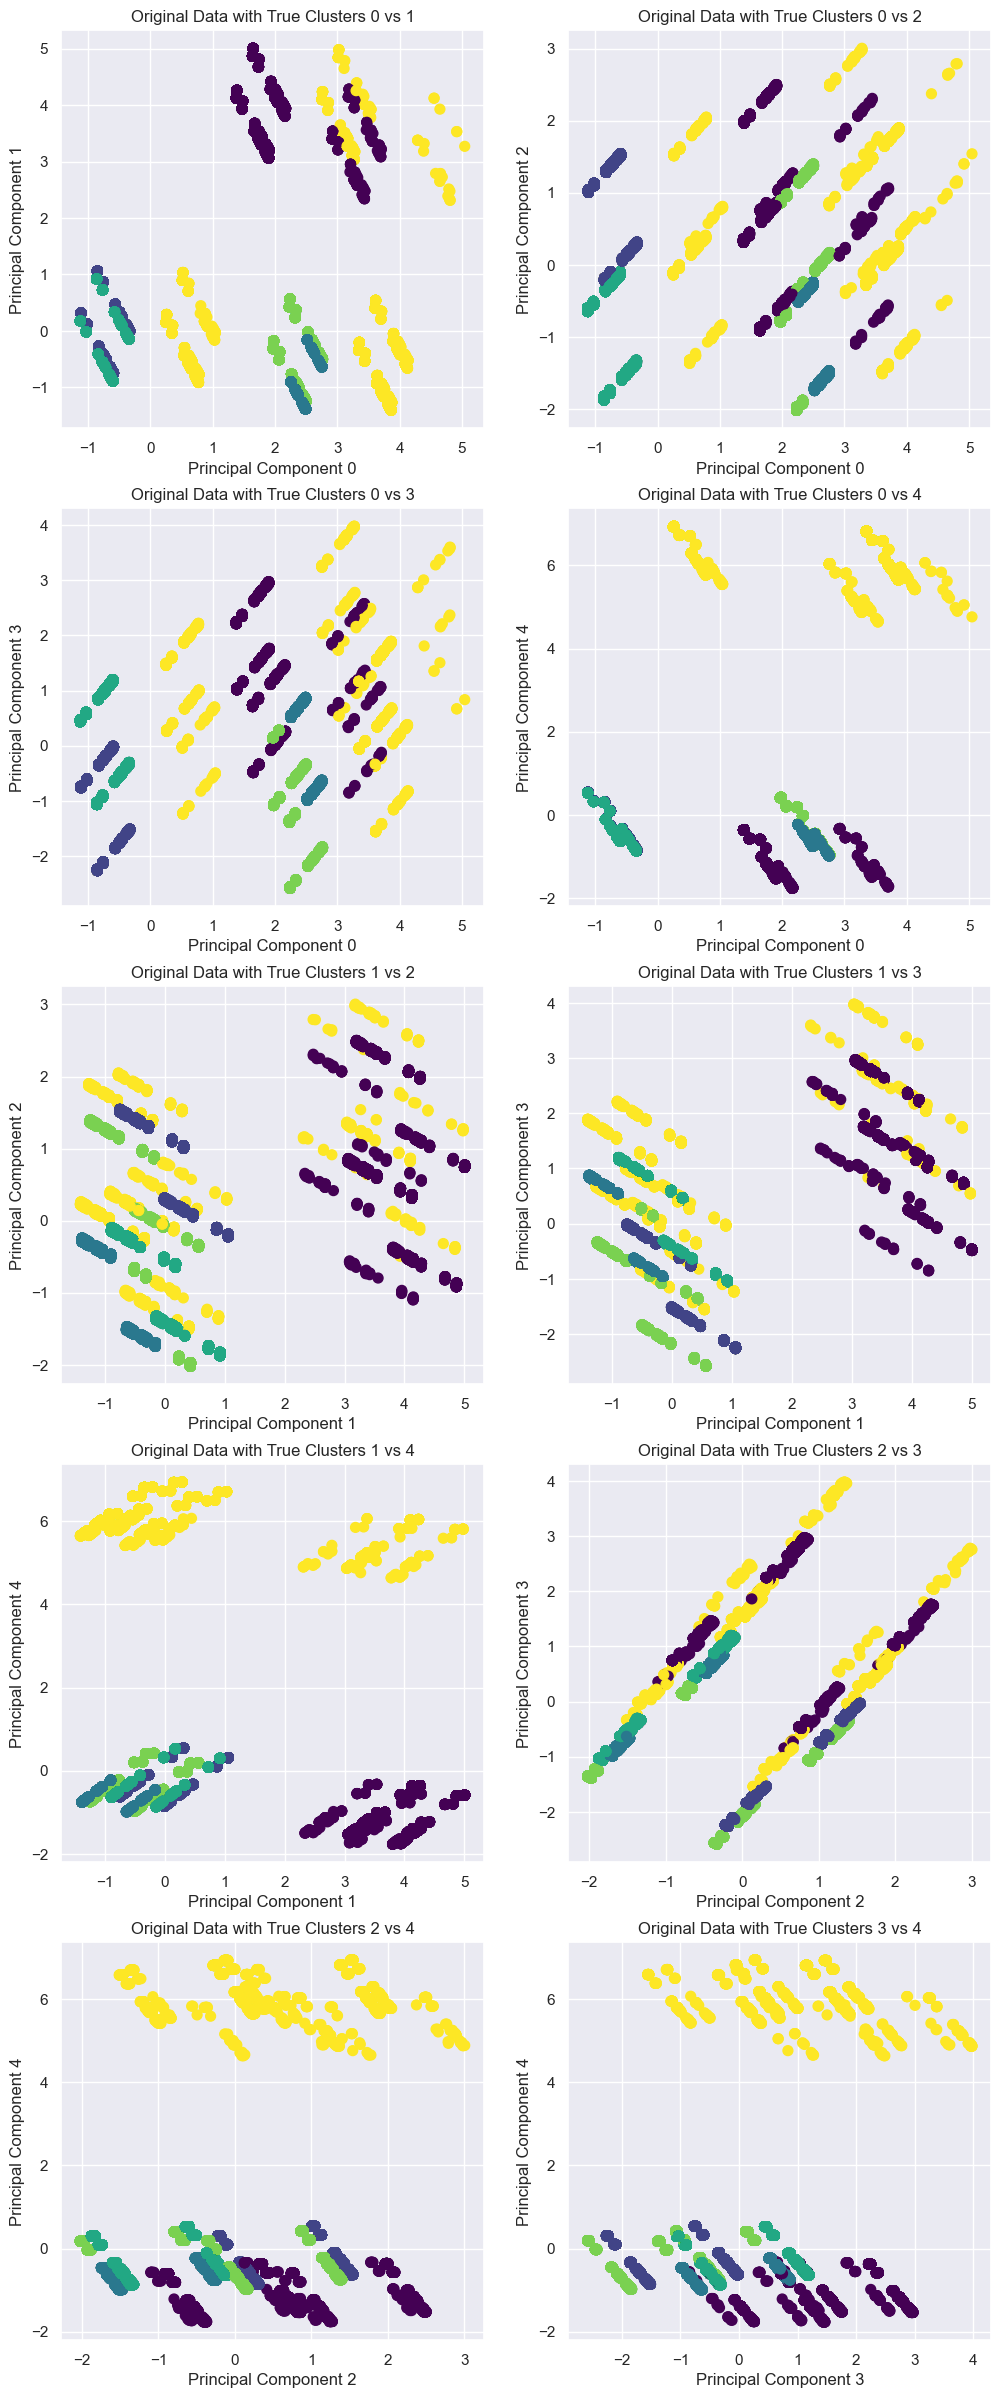

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(df2)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(df2)

# Plot the original data with cluster assignments
plt.figure(figsize=(12, 30))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2),
                    (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(5, 2, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

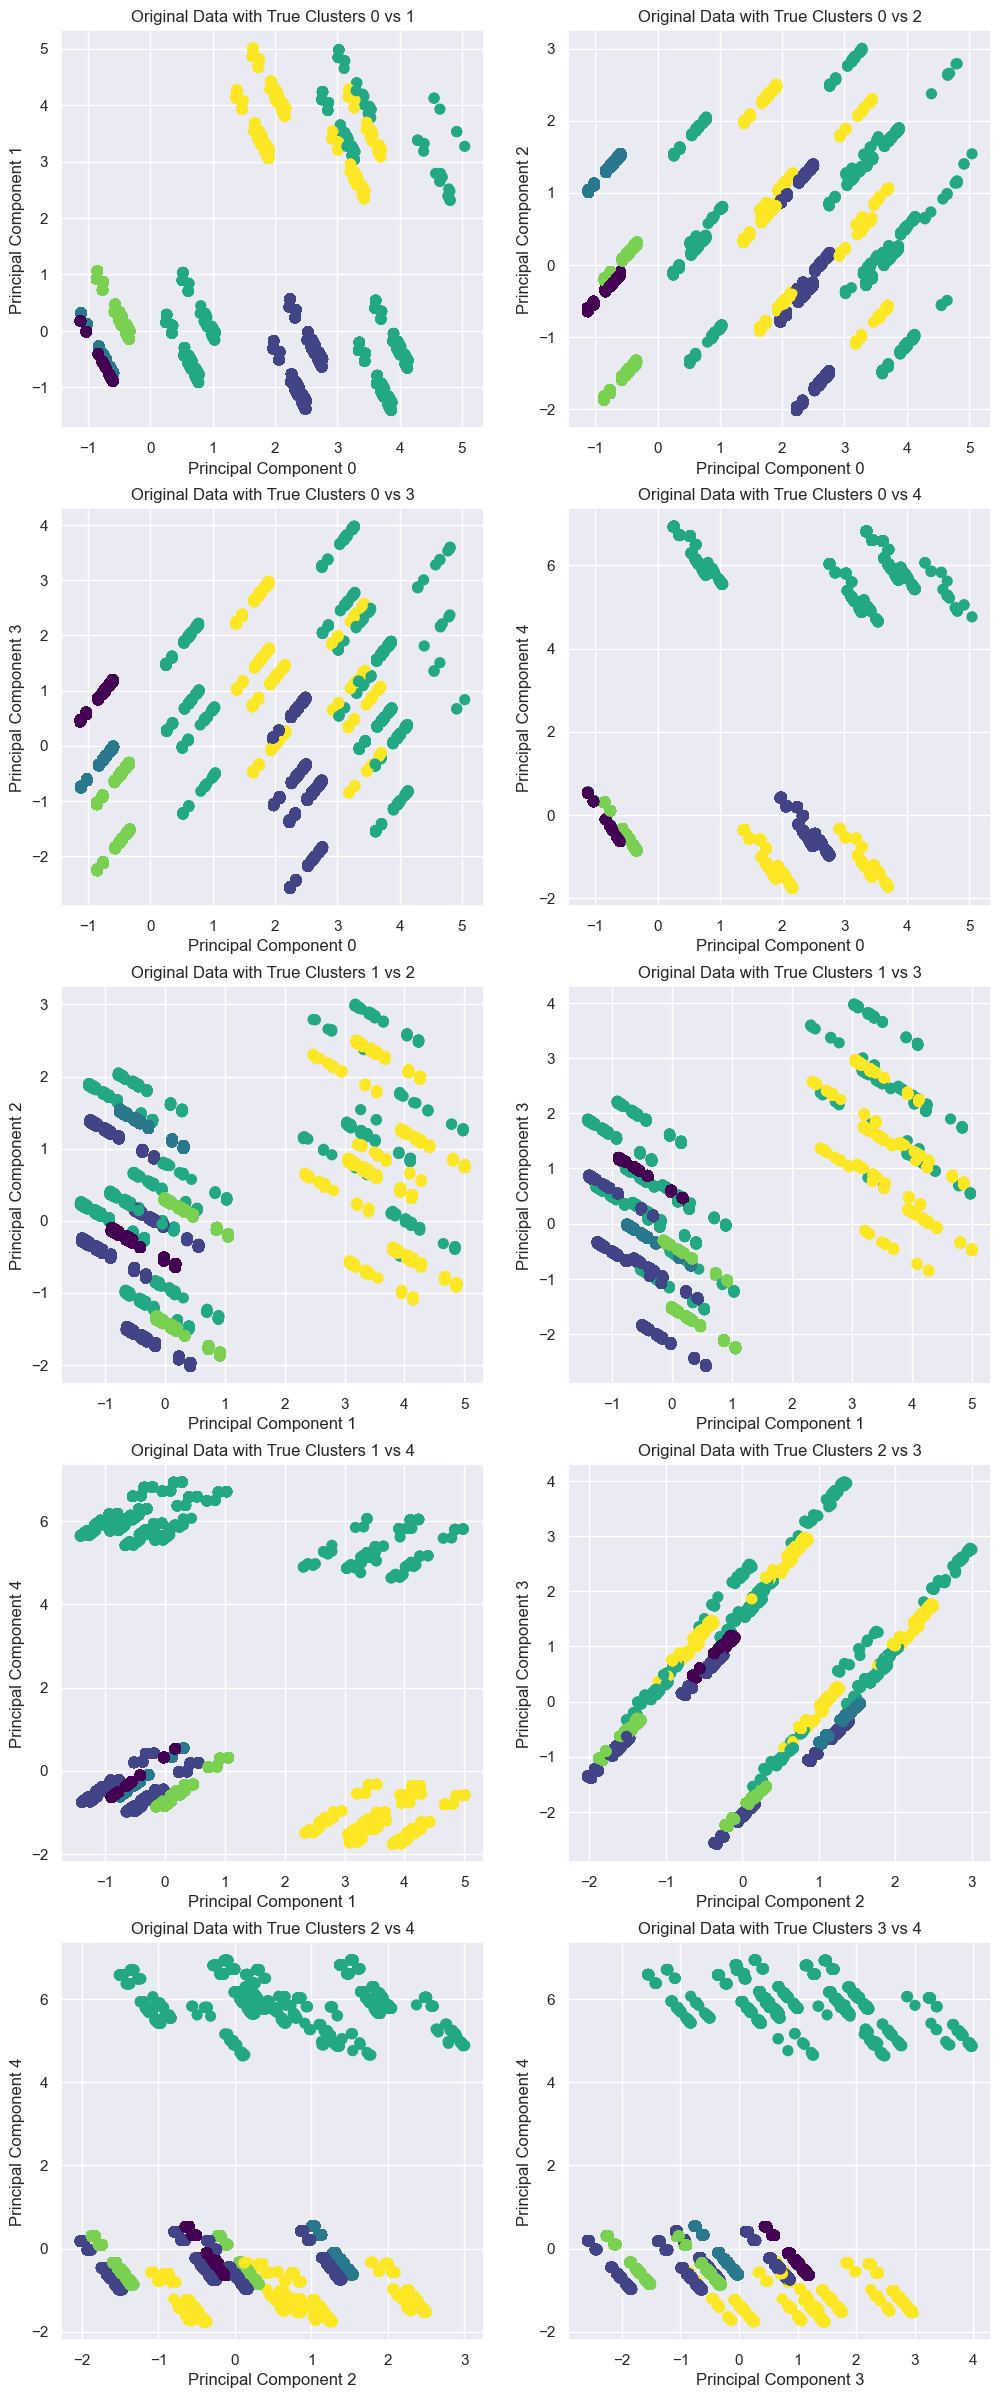

In [73]:
agg_clustering = AgglomerativeClustering(n_clusters=6)
labels = agg_clustering.fit_predict(df2)


plt.figure(figsize=(12, 30))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2),
                    (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(5, 2, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=labels,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

98737


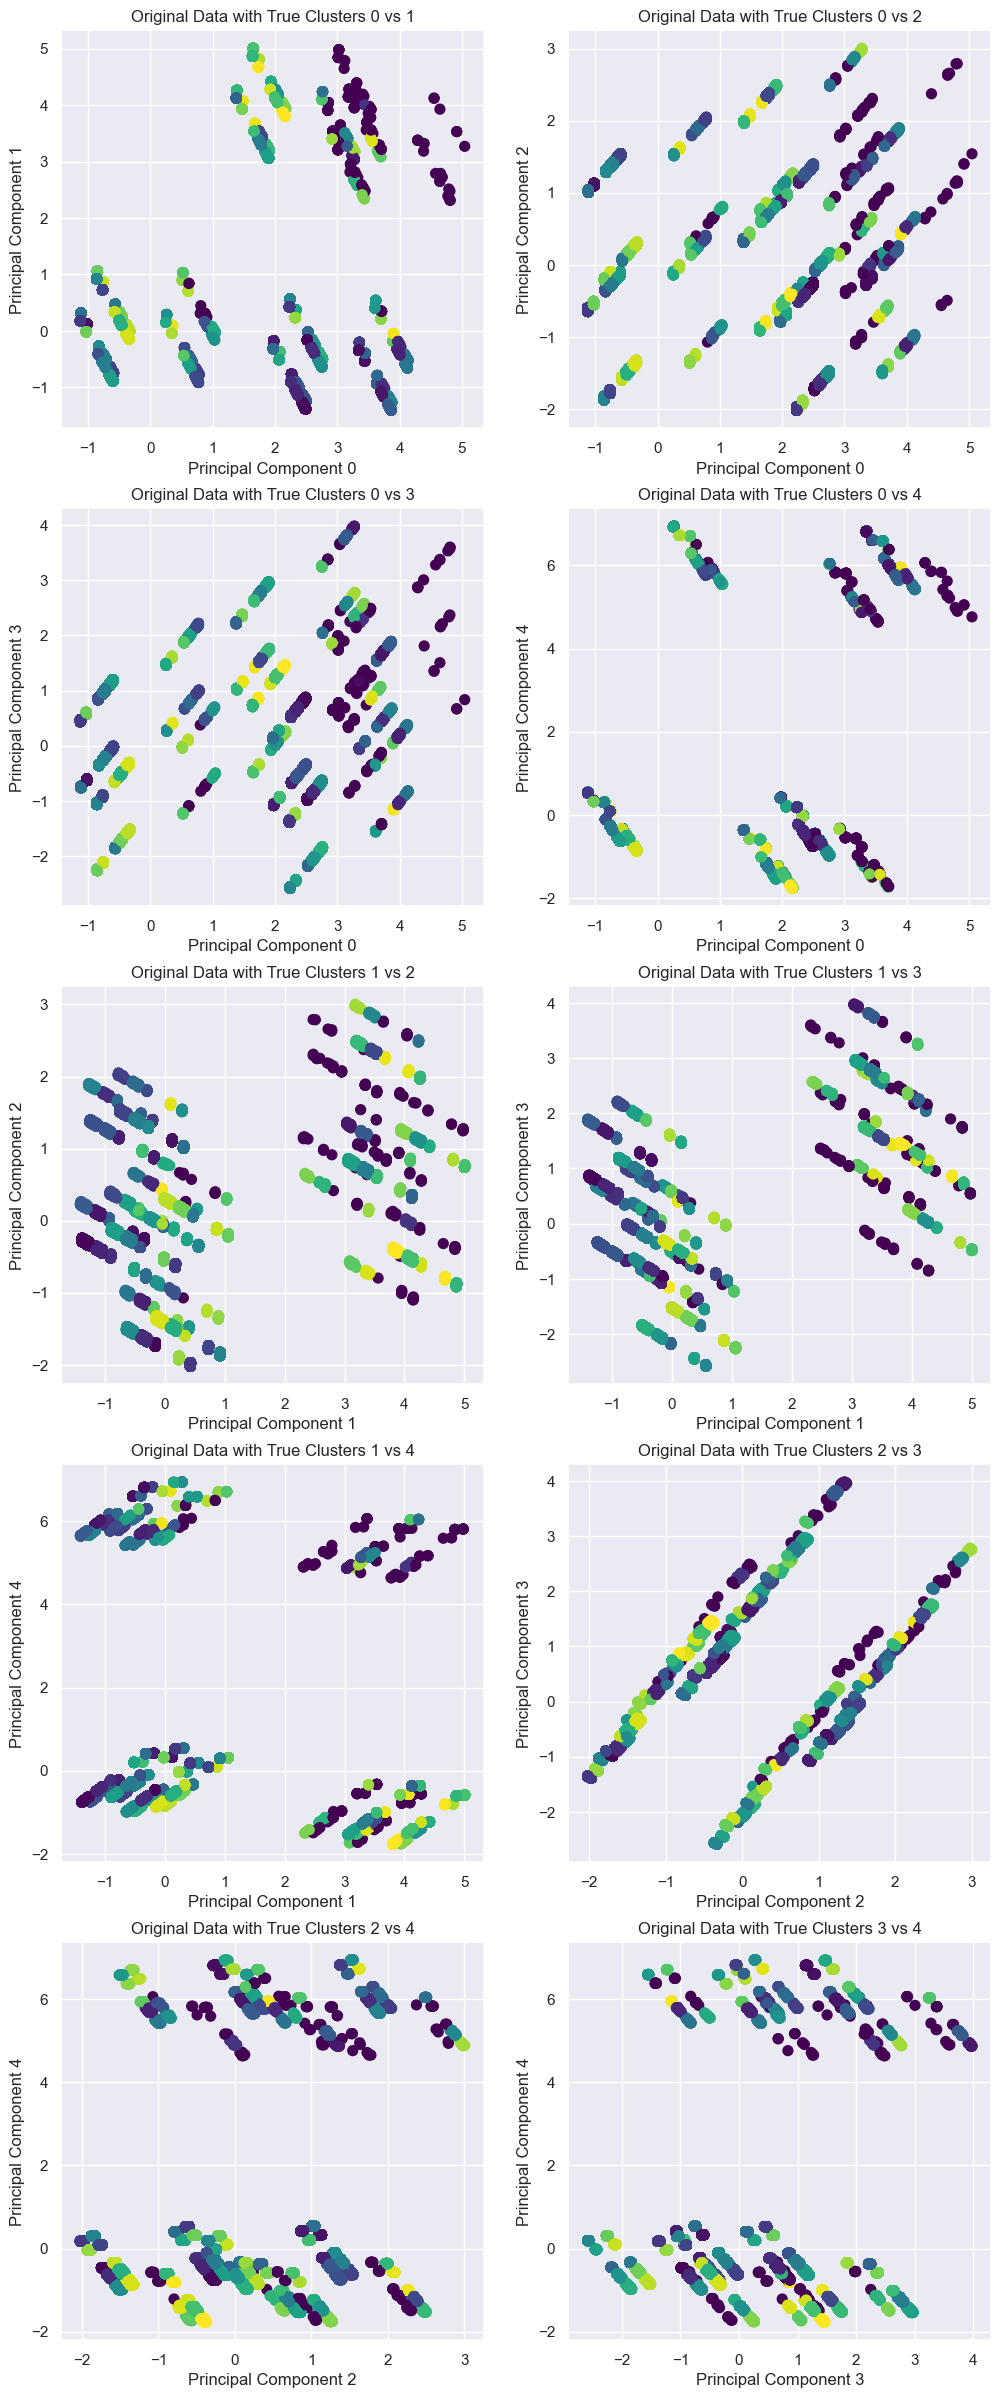

In [72]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_dbscan = dbscan.fit_predict(df2)

print((y_dbscan != -1).sum())

plt.figure(figsize=(12, 30))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2),
                    (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(5, 2, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=y_dbscan,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')